# Bigmart Sales Data Set using machine learning for bigenners

Retail is another industry which extensively uses analytics to optimize business processes. Tasks like product placement, inventory management, customized offers, product bundling, etc. are being smartly handled using data science techniques. As the name suggests, this data comprises of transaction records of a sales store. This is a regression problem. The data has 8523 rows of 12 variables.

### Problem: Predict the sales of a store.

Let’s have a look at the Big Mart Sales data and build a Linear Regression Model in the Live Coding window below.

1. import library
    * pandas and numpy to manip the data 
    * matplotlib and seaborn for the visualization
2. load data 
3. exploring data and analys
4. data cleaning
5. data visualization
6. feature selection
7. feature transformation
8. split data
9. machine learning algo 
![](https://miro.medium.com/max/499/1*LXEEUY5Vf3tTCMFC41llJQ.png)

# 1) import library

### A) library data controls

In [1]:
import pandas as pd 
import numpy as np


### B) library data vizualisation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
sns.set_style('darkgrid')


In [3]:
matplotlib.rcParams['figure.figsize']=(10,10)
matplotlib.rcParams['font.size']=15

# 2) load data

In [4]:
mart = pd.read_csv('bigmart_data.csv')
mart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# 3 ) Exploring data 

In [5]:
mart.shape

(8523, 12)

so we had (8523) rows train data set has both input and output variable(s). You need to predict the sales for test data set.

In [6]:
mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


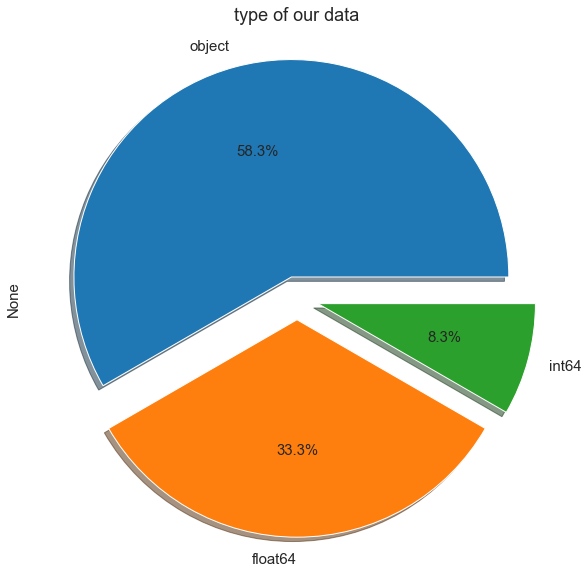

In [8]:
mart.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');

##### type : object
Item_Identifier      : Unique product ID                     
Item_Fat_Content     : Whether the product is low fat or not         
Item_Type            : 	The category to which the product belongs          
Outlet_Identifier    : Unique store ID                          
Outlet_Size          : 	The size of the store in terms of ground area covered              
Outlet_Location_Type : The type of city in which the store is located                    
Outlet_Type          : Whether the outlet is just a grocery store or some sort of supermarket     
##### type : numerical
Item_Weight                 : Weight of product        
Item_Visibility             : The % of total display area of all products in a store allocated to the particular product         
Item_MRP                    : Maximum Retail Price (list price) of the product                                       
Outlet_Establishment_Year   : The year in which store was established                                               
Item_Outlet_Sales  (traget) : 	Sales of the product in the particular store. This is the outcome variable to be predicted.       

In [9]:
mart.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


## 4 ) data cleaning 

In [10]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
mart.isnull().sum()/len(mart)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

***so we had : 17% of Item_Weight + 28 % of Outlet_Size missing value***

### A) Item_Weight missing value

In [12]:
mart.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
mart.Item_Weight.fillna(mart.Item_Weight.mean(),inplace=True)

### B) Outlet_Size missing value

In [14]:
mart.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
mart.Outlet_Size.fillna('Medium',inplace=True)

### C) verification 

In [16]:
mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 5) data visualaization

C:\Users\91994\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


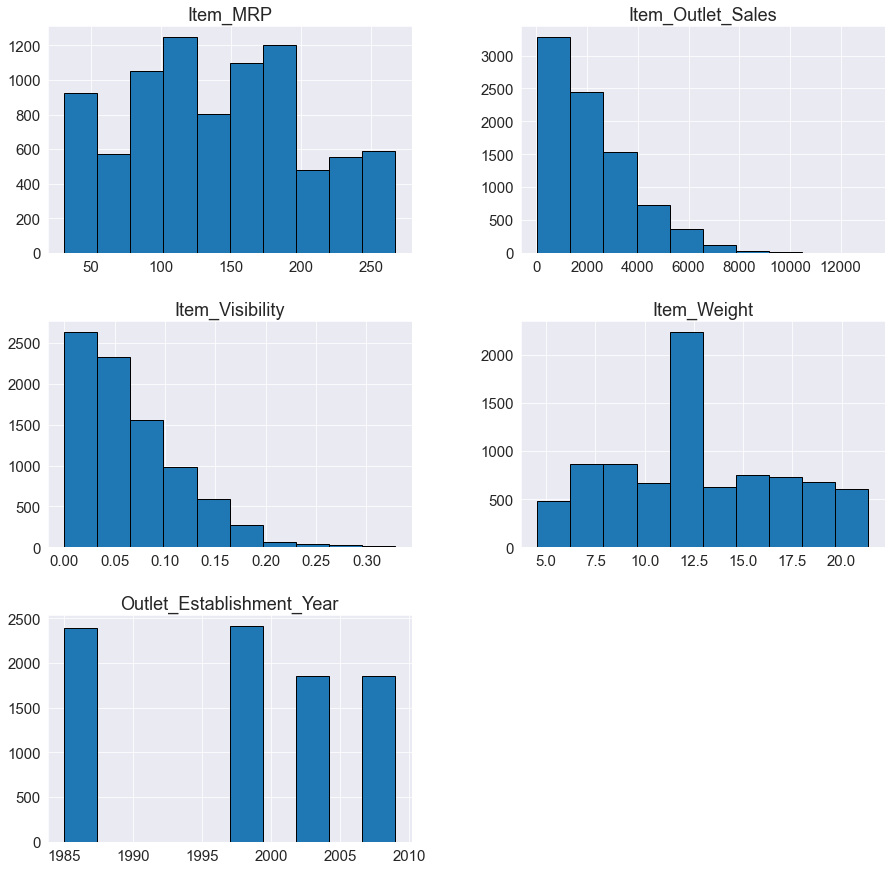

In [17]:
mart.hist(figsize=(15,15),edgecolor='black');

### A) type : numerical

* Item_Weight
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales  (traget)

#####  a) Item_Weight

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

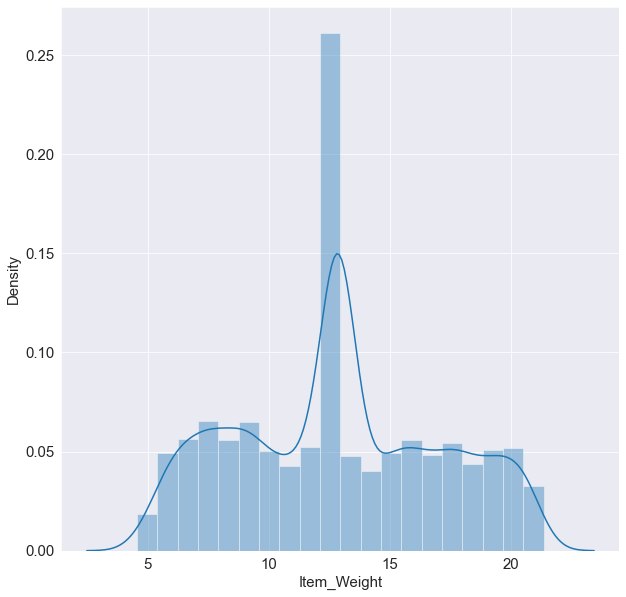

In [18]:
sns.distplot(mart.Item_Weight,kde=True,bins=20)

#####  b) Item_Visibility

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

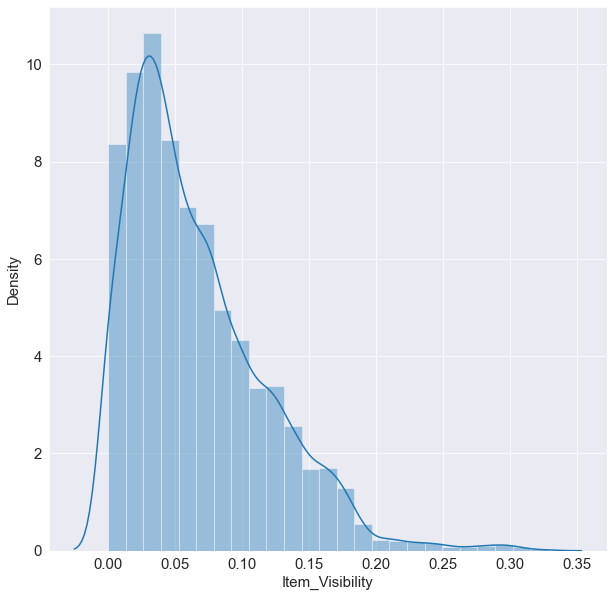

In [19]:
sns.distplot(mart.Item_Visibility,kde=True,bins=25)

#### c) Item_MRP

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

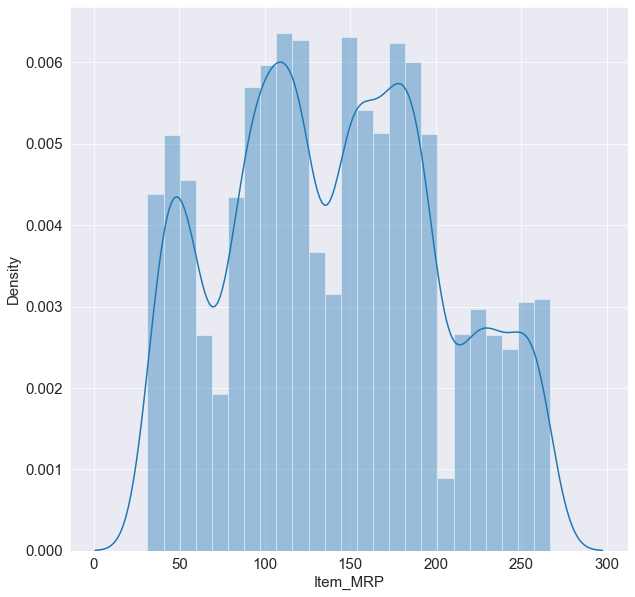

In [20]:
sns.distplot(mart.Item_MRP,kde=True,bins=25)

#### d) Outlet_Establishment_Year

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

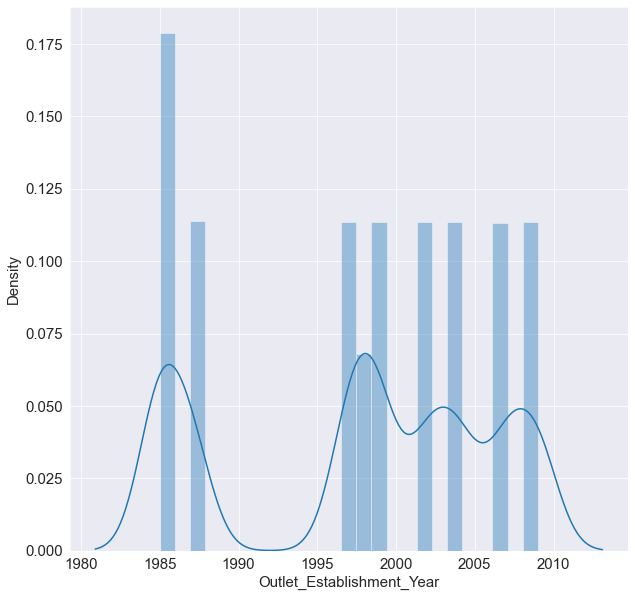

In [21]:
sns.distplot(mart.Outlet_Establishment_Year,kde=True,bins=25)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

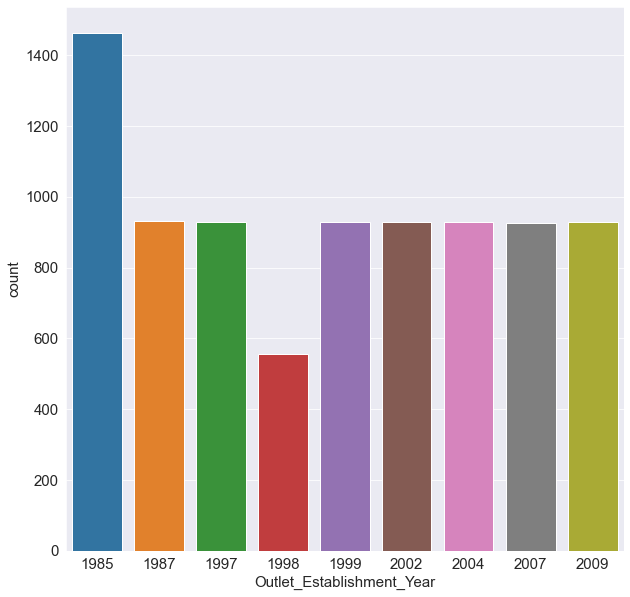

In [22]:
sns.countplot(x='Outlet_Establishment_Year',data=mart,)

<AxesSubplot:ylabel='Outlet_Establishment_Year'>

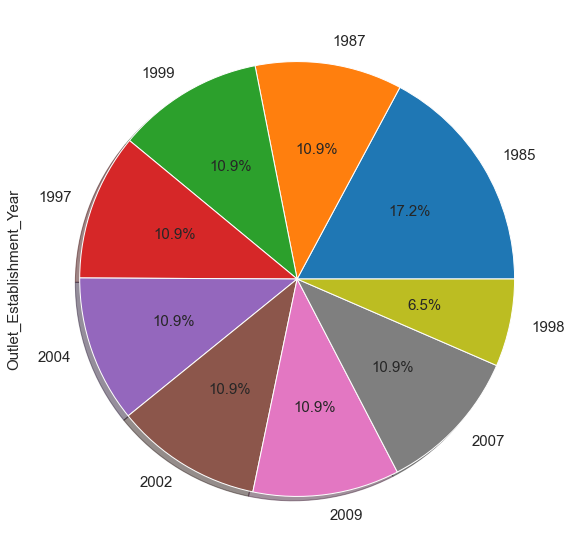

In [23]:
mart.Outlet_Establishment_Year.value_counts().plot.pie(autopct='%1.1f%%',shadow=True)

#### e) Item_Outlet_Sales (traget)

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

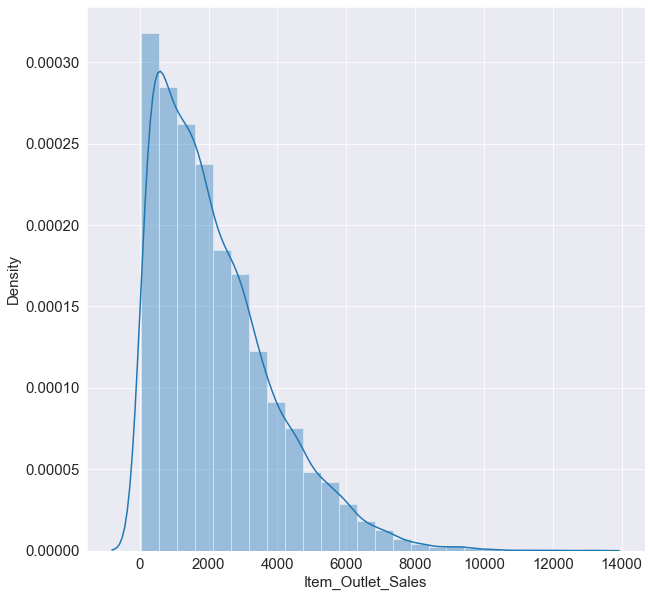

In [24]:
sns.distplot(mart.Item_Outlet_Sales,kde=True,bins=25)

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


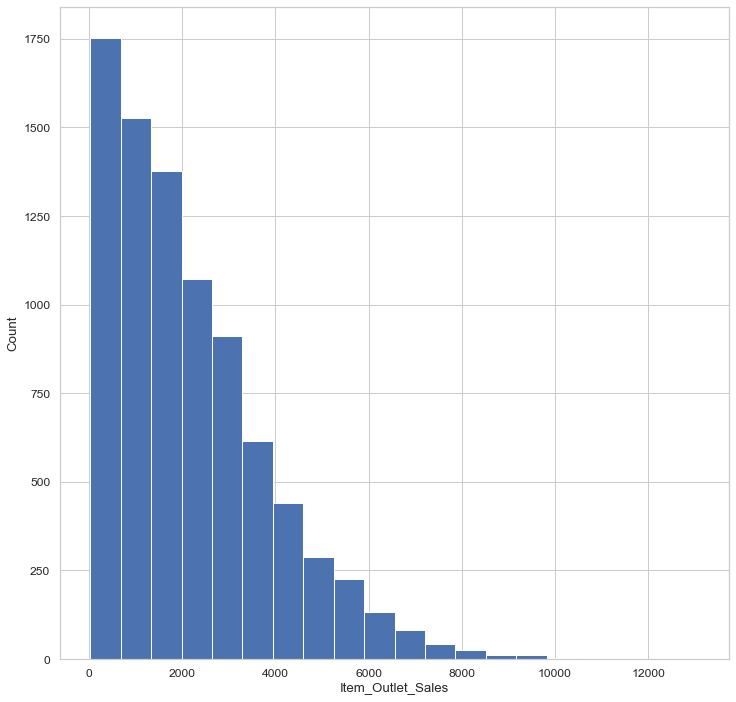

In [25]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [12, 12]})
sns.distplot(
    mart['Item_Outlet_Sales'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Item_Outlet_Sales', ylabel='Count');

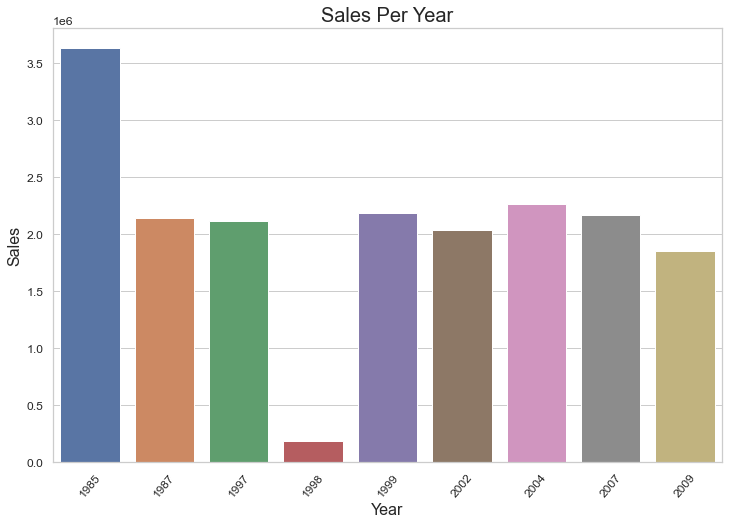

In [26]:
y = mart.groupby(['Outlet_Establishment_Year']).sum()
y = y['Item_Outlet_Sales']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Sales', fontsize=16)
ax.set_title(label='Sales Per Year', fontsize=20)
plt.show();

### B) type : object
* Item_Identifier      : Unique product ID       ( will be doped )               
* Item_Fat_Content     : Whether the product is low fat or not         
* Item_Type            : 	The category to which the product belongs          
* Outlet_Identifier    : Unique store ID                          
* Outlet_Size          : 	The size of the store in terms of ground area covered              
* Outlet_Location_Type : The type of city in which the store is located                    
* Outlet_Type          : Whether the outlet is just a grocery store or some sort of supermarket 

### a) Item_Fat_Content

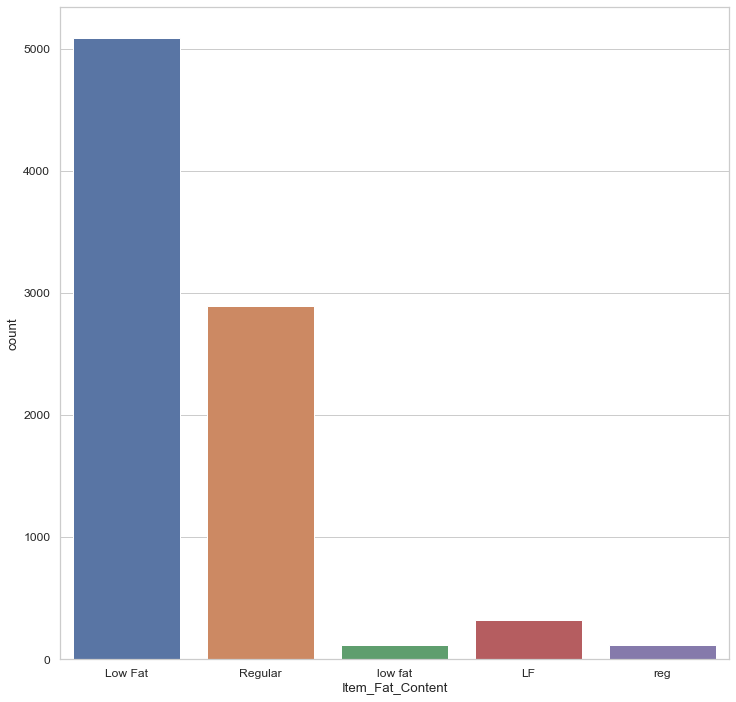

In [27]:
sns.countplot(x='Item_Fat_Content',data=mart);

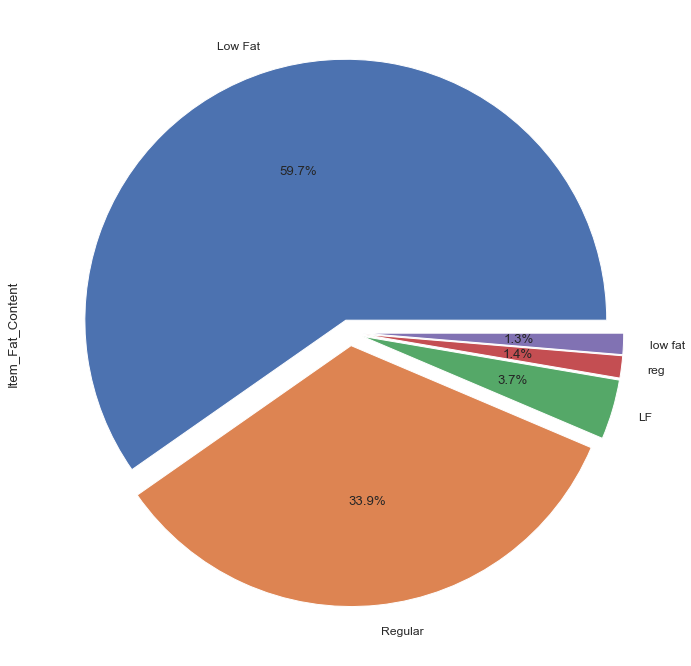

In [28]:
mart.Item_Fat_Content.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

### b) Item_Type

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


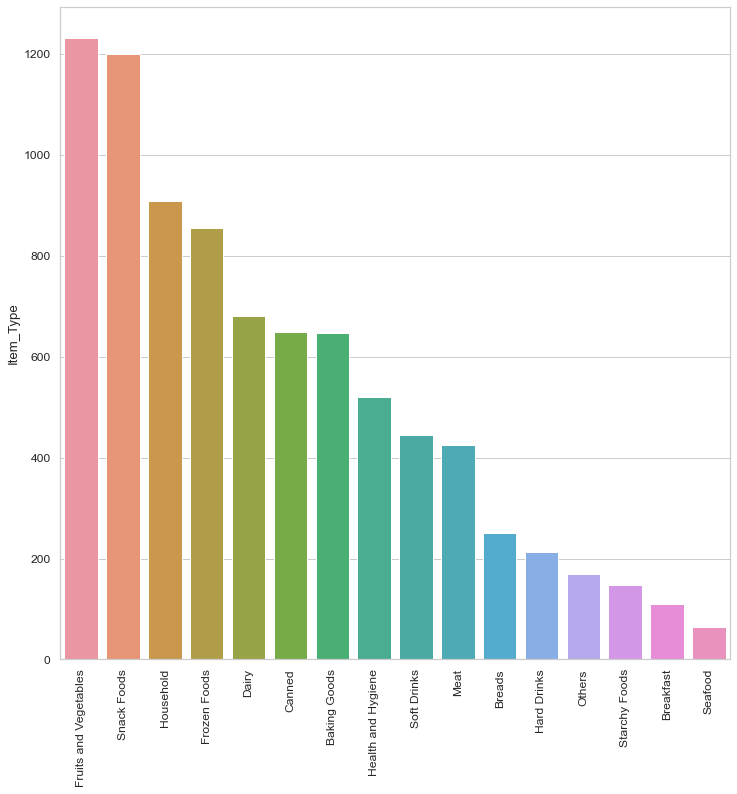

<Figure size 1080x1080 with 0 Axes>

In [29]:
Item_Type1=mart.Item_Type.value_counts().head(20)
sns.barplot(Item_Type1.index,Item_Type1)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

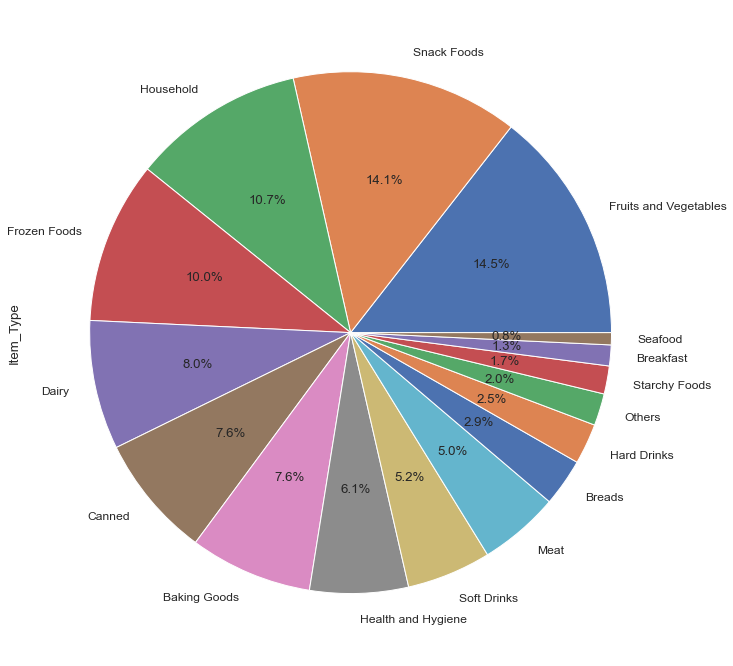

In [30]:
mart.Item_Type.value_counts().plot.pie(autopct='%1.1f%%',shadow=False);

### c) Outlet_Size

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


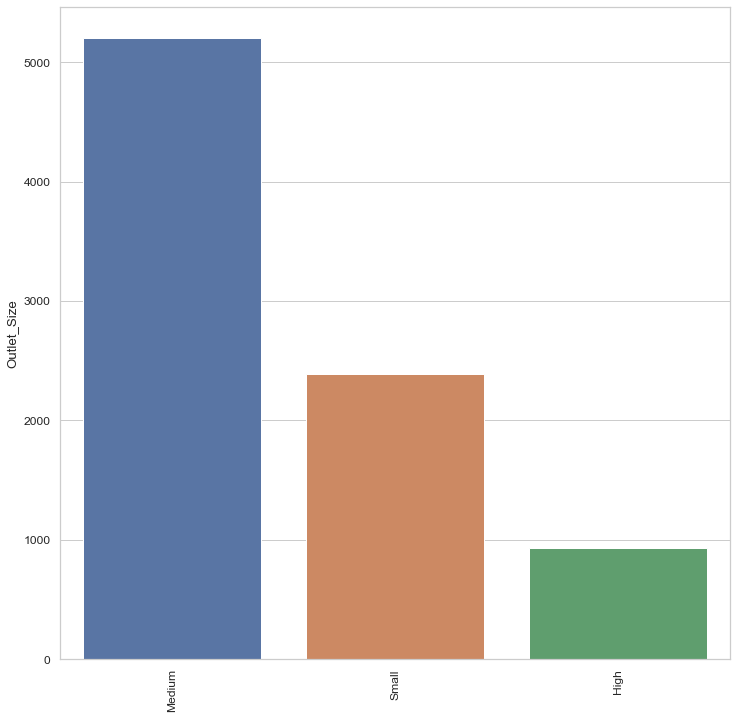

<Figure size 1080x1080 with 0 Axes>

In [31]:
Outlet_Size1=mart.Outlet_Size.value_counts().head(3)
sns.barplot(Outlet_Size1.index,Outlet_Size1)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

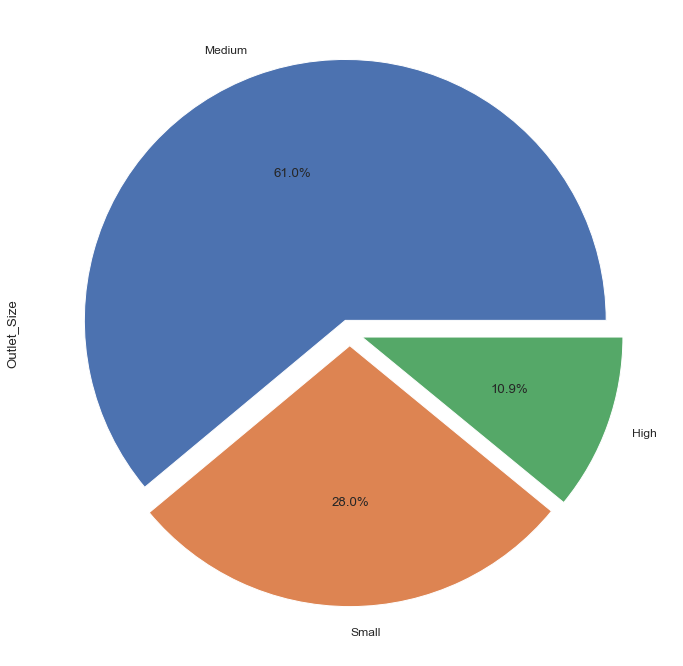

In [32]:
mart.Outlet_Size.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

### d) Outlet_Location_Type

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


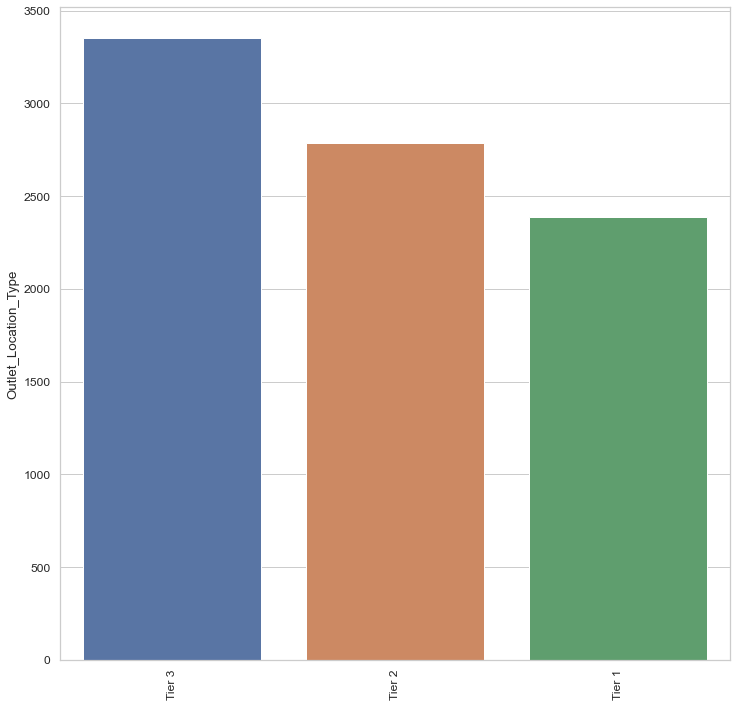

<Figure size 1080x1080 with 0 Axes>

In [33]:
Outlet_Location_Type1=mart.Outlet_Location_Type.value_counts().head(3)
sns.barplot(Outlet_Location_Type1.index,Outlet_Location_Type1)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

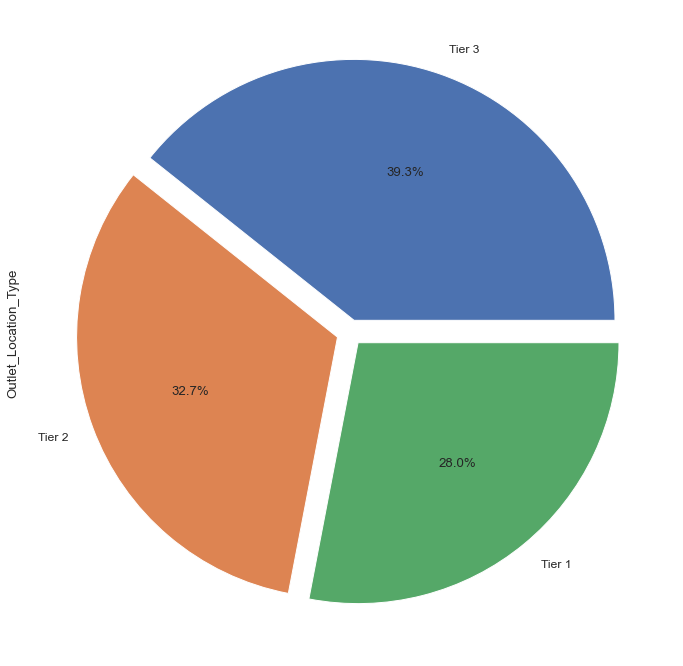

In [34]:
mart.Outlet_Location_Type.value_counts().plot.pie(explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

### e) Outlet_Type

C:\Users\91994\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


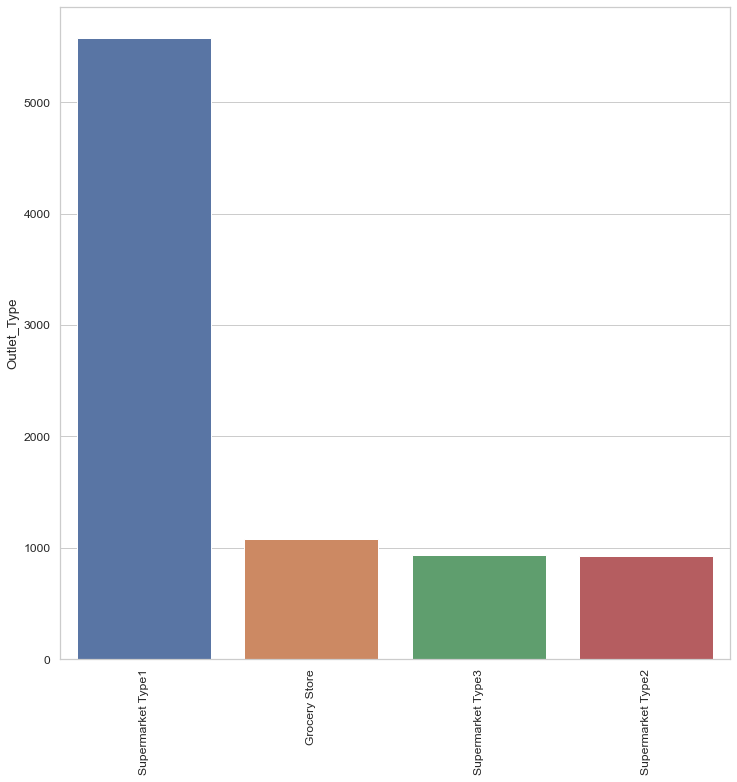

<Figure size 1080x1080 with 0 Axes>

In [35]:
Outlet_Type1=mart.Outlet_Type.value_counts().head(5)
sns.barplot(Outlet_Type1.index,Outlet_Type1)
plt.xticks(rotation=90)
plt.figure(figsize=(15,15));

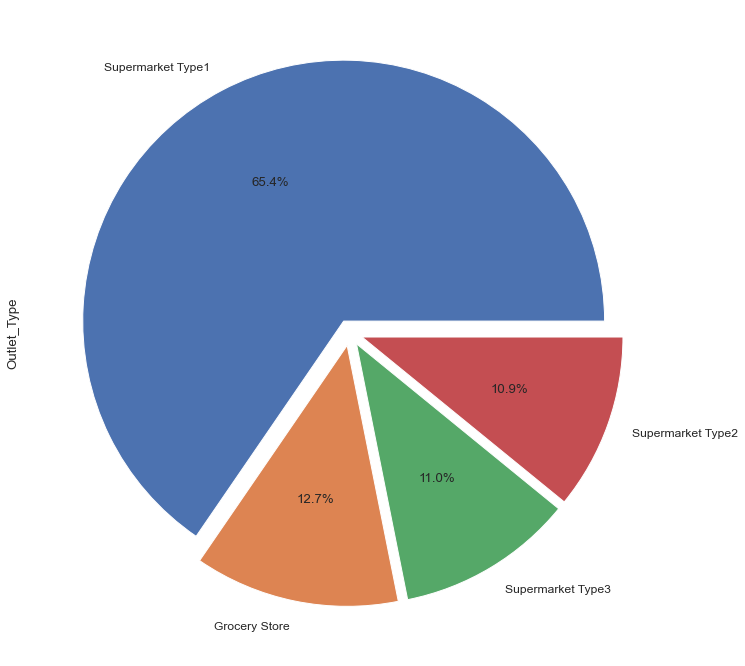

In [36]:
mart.Outlet_Type.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

# 6) feauturs selection 

### columns that we gonna delete
Item_Identifier      : Unique product ID    ==> delete                           
Outlet_Identifier    : Unique store ID  ==> delete                        
      

In [37]:
mart=mart.drop('Item_Identifier',axis=1)
mart=mart.drop('Outlet_Identifier',axis=1)
mart

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# 7) transform data from categorical to numerical

In [38]:
# Item_Fat_Content/Item_Type/Outlet_Size/Outlet_Location_Type/Outlet_Type

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

### Item_Fat_Content

In [40]:
mart.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [41]:
mart.Item_Fat_Content=le.fit_transform(mart.Item_Fat_Content)

In [42]:
mart.Item_Fat_Content.value_counts()

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64

* 0 ==> LF          
* 1 ==> Low Fat
* 2 ==> Regular    
* 3 ==> low fat
* 4 ==> reg

### Outlet_Size

In [43]:
mart.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [44]:
mart.Outlet_Size=le.fit_transform(mart.Outlet_Size)

In [45]:
mart.Outlet_Size.value_counts()

1    5203
2    2388
0     932
Name: Outlet_Size, dtype: int64

### Outlet_Location_Type

In [46]:
mart.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [47]:
mart.Outlet_Location_Type=le.fit_transform(mart.Outlet_Location_Type)

In [48]:
mart.Outlet_Location_Type.value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

### Outlet_Type

In [49]:
mart.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [50]:
mart.Outlet_Type=le.fit_transform(mart.Outlet_Type)

In [51]:
mart.Outlet_Type.value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

### Item_Type

In [52]:
mart.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [53]:
mart.Item_Type=le.fit_transform(mart.Item_Type)

In [54]:
mart.Item_Type.value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [55]:
mart

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


# 8) split data 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [57]:
x=mart.drop('Item_Outlet_Sales',axis=1)
y=mart.Item_Outlet_Sales

In [58]:
print(x.shape)
print(y.shape)

(8523, 9)
(8523,)


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

### 1)	Linear Regression 

In [60]:
from sklearn import linear_model
#Train the model
model = linear_model.LinearRegression()
#Fit the model
model.fit(x_train, y_train)
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)


Accuracy -->  51.458084503625855


### 2)	RandomForestRegressor 

In [61]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
#Fit
model.fit(x_train, y_train)
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)


Accuracy -->  55.510068554455486
